# Null Hypothesis Significance Testing (NHST)
...

## Estimates and Population Values

### Comparing an Estimate with a Hypothesised Value
We will denote our estimate $\hat{\beta}_{1}$ as usual, and our hypothesised population value as $\beta_{1}^{(0)}$. Hopefully this makes it clear that we still do not know what value $\beta_{1}$ has, but we are simply taking a guess.

### Interpretation of the Effect
The magnitude of our calculated effect tells us how far away our estimate is from our hypothesised population value. It would be tempting to therefore interpret a large difference as indicative that our hypothesised value is wrong, or a small differences as indicative that our hypothesised value may be correct. However, there are two problems with trying to interpret the effect in this manner. Firstly, the magnitude of the difference depends upon the units of $y$, which can cause problems both for intepretation, but also for comparison across different studies and contexts. Secondly, the effect on its own does not take into account the degree of uncertainty around the estimation process. Within the context of NHST, both these issues are resolved by defining a *test statistic*.


## Test Statistics
We can think of this as either dividing an estimate by its uncertainty, *or* scaling an estimate by its precision. 

### The $z$-statistic
Dividing a normal random variable by a constant simply *scales* that random variable and so the shape of the distribution does not change, only the units.

## The Null Hypothesis

This simplifies the calculation of the test statistic greatly, because our hypothesised value is then 0 and disappears from the calculation.

Importantly, the null value does not have to be 0. But the test will always compare the *difference* to 0. For instance, if we did use $\beta_{1}^{(0)} = 0$ then

$$
z = \frac{\hat{\beta}_{1} - \beta_{1}^{(0)}}{} = \frac{\hat{\beta}_{1} - 0}{} = \frac{\hat{\beta}_{1}}{}.
$$

By dividing the parameter estimate by the standard error, we are *implicitly* comparing the *difference* between $\hat{\beta}_{1}$ and $0$. Alternatively, if we used $\beta_{1}^{(0)} = 5$ then

$$
z = \frac{\hat{\beta}_{1} - \beta_{1}^{(0)}}{} = \frac{\hat{\beta}_{1} - 5}{}
$$

and we are comparing the *difference* between $\hat{\beta}_{1}$ and $5$ to $0$. So, in every case, the numerator represents an offset from 0, whether that is the value of the parameter itself, or a difference with some other proposed value. In other words, the null is always that that *magnitude of the difference is 0*, but that difference can be defined in lots of different ways.

```{admonition} Null Comparisons in Software
:class: tip
Generally speaking, we do not always have control over what value is used for the proposed value in software. For instance, within the context of a linear model, we will automatically get test statistics that use an implicit proposed value of 0, as the software will simply divide the estimate by the standard error. For regression slopes, this is fine because a slope of 0 indicates *no relationship* and thus is sensible. However, for the intercept, the test is asking whether $\beta_{0}^{(0)} = 0$. In other words, could the population slope be a regression through the origin? For many problems, this is not a very sensible or meaningful question and thus the test on the intercept is largely ignored. This highlights the importance of considering what *question* tests are asking when they are produced automatically.
```

## Null Distributions

### The $t$-statistic
In the previous section, we saw that the standard error of the sampling distribution of $\hat{\beta}_{1}$ depends upon $\sigma^{2}$. However, in practise, we do not known $\sigma^{2}$. Instead, we have an estimate derived from the residuals $\hat{\sigma}^{2}$. So how does that change things? We can plug-in our estimate like so

$$
\widehat{\text{Var}}\left(\hat{\beta}_{1}\right) = \frac{\hat{\sigma}^{2}}{(n-1)s^{2}_{x}}
$$

and we have a value for the variance from which we can take the square-root to give the standard error. However, what we have done here is replaced a *constant* ($\sigma^{2}$) with a *random variable* ($\hat{\sigma}^{2}$). This means we have introduced randomness into this calculation. In other words, the standard error will change with each sample. In fact, what we have created is an *estimate* of the variance of $\hat{\beta}_{1}$. So, we now have an estimate of the variance of an estimate. This means that the denominator of our test statistic is no longer a constant that simple scales the distribution. Rather, we are now dividing a *random variable* by *another random variable*.

So what happens when you divide one random variable by another? You end up with a distribution that changes shape dynamically. ... For the $t$-distribution, the dynamic reshaping of the distribution depends upon the distribution's *degrees of freedom*, which are directly informed by the sampling distribution of the standard error. So, rather than having a fixed shape like a standard normal distribution, the $t$-distribution can grow fatter or thinner, depending upon the properties of the denominator. This is illustrated below. 

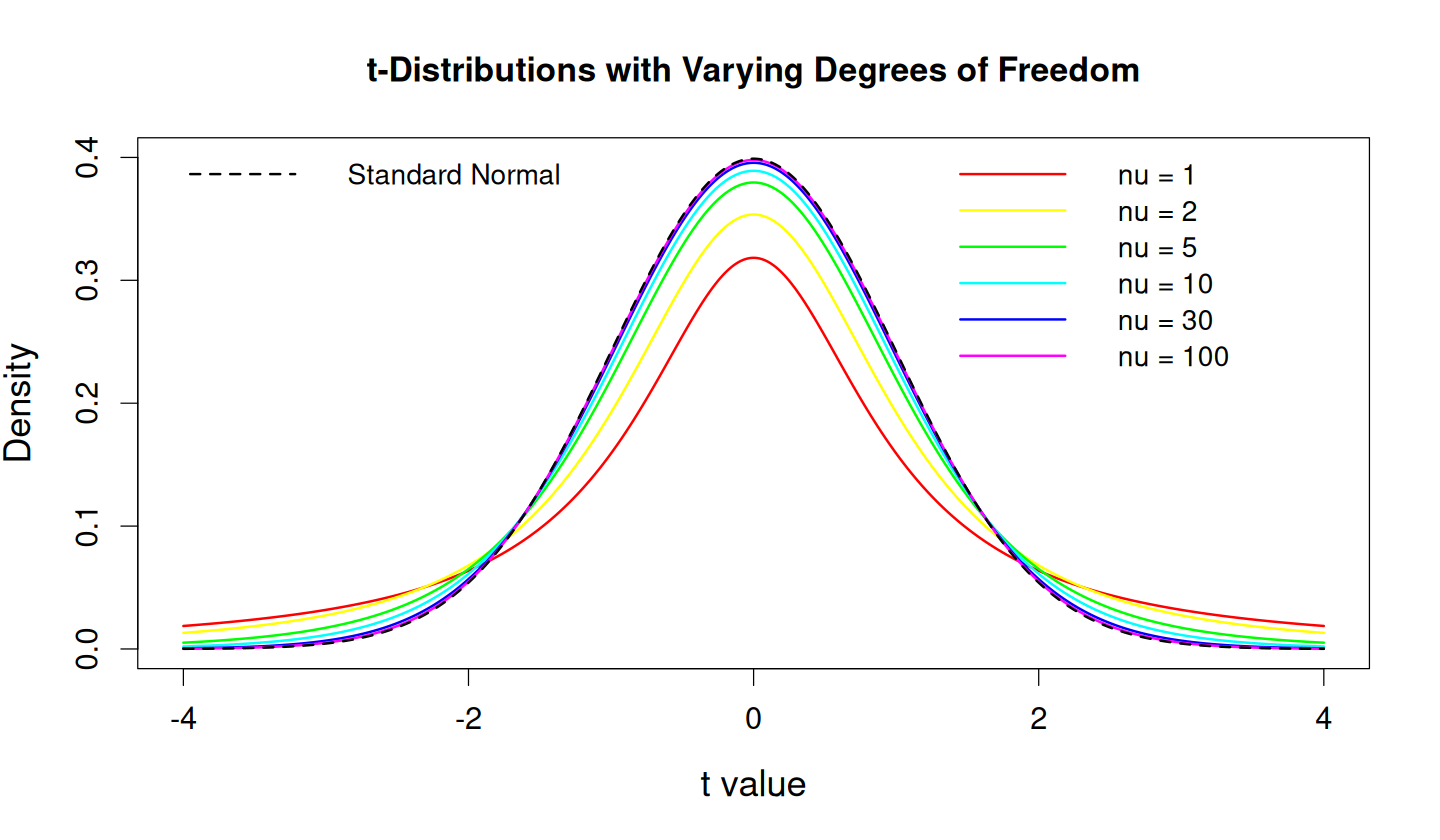

In [ ]:
options(repr.plot.width=12, repr.plot.height=7)

# Set up the x-axis range
x <- seq(-4, 4, length.out = 500)

# Define degrees of freedom to compare
dfs <- c(1, 2, 5, 10, 30, 100)

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Set up plot
plot(x, dt(x, df = 1), type = "n", ylim = c(0, 0.4),
     xlab = "t value", ylab = "Density",
     main = "t-Distributions with Varying Degrees of Freedom")

# Define a color palette
colors <- rainbow(length(dfs))

# Add lines for each t-distribution
for (i in seq_along(dfs)) {
  lines(x, dt(x, df = dfs[i]), col = colors[i], lwd = 2)
}

# Add standard normal distribution for reference
lines(x, dnorm(x), col = "black", lwd = 2, lty = 2)

# Add legend
legend("topright", legend = paste("nu =", dfs),
       col = colors, lwd = 2, bty = "n")

legend("topleft", legend = "Standard Normal", col = "black", lty = 2, lwd = 2, bty = "n")



An important result here is that as $n \rightarrow \infty$, the $t$-distribution converges on the normal distribution. This is because the scaling introduced by the degrees of freedom becomes so large that it has basically no effect. If we therefore wanted to ignore the fact that $\hat{\sigma}^{2}$ was an estimate, we could say that our test statistic is *asymptotically* normally distributed. In other words, as $n$ approaches infinity, this is correct. Of course, this is only sensible mathematically, as we will never have an *infinite* sample size. However, for practical purposes, this just means that the *larger* the sample size, the more we can trust this simplification. As we can see above, when $\nu > 100$ the $t$-distribution becomes practically indistinguishable from the standard normal distribution. Although this may seem unnecessary, later in the course we will be exmaining mixed-effects models where the concepts of degrees of freedom can break-down. In this situation, one option is to rely on test statistics that do not depend upon the degrees of freedom and just assume an asymptotically correct distribution.


## The $p$-value

This level is referred to as $\alpha$.

Fisher vs Neyman-Pearson

Fisher actually viewed $p$-values as continuous evidence against the null, rather than as a threshold value for declaring significance. In fact, although the criterion of 0.05 is attributed to Fisher, it is insightful to see what he *actually* said about it:

```{epigraph}
The value for which $p = 0.05$, or 1 in 20, is convenient to use in practice if we want to draw a line beyond which we say that the deviation is significant, but it must not be forgotten that we shall often draw such a line when there is nothing there but chance.

-- Ronald Fisher
```

So, Fisher viewed this criterion as a convenient heuristic, but fully acknowledged its limitations and did not ever state that we should *reject* the null hypothesis when $p < 0.05$. Indeed, Fisher strongly disagreed with the Neyman-Pearson concept of rejecting or failing to reject the null

```{epigraph}
It is a mistake to speak of the null hypothesis as though it were a thing we are testing, or as though we were trying to accept or reject it.

-- Ronald Fisher
```

Indeed, in Fisher's conceptualising a small $p$-value simply means that the data are surpring under the null, whereas a large $p$-value means that the data are not surprising under the null. Smaller $p$-values present more evidence against the null, but only so far as we make the logical leap of saying that very suprising data make it less likely that the null is correct. However, we would not *reject* the null, because it still remains possible that the null is correct. All we are saying is that the data we have are less compatible with the null. Nothing more.

## Confidence Intervals

What we were actually looking at here were 68% confidence intervals.

Notice that this depends upon assuming normality.

## Inference in `R`

In [1]:
data(mtcars)

mod <- lm(mpg ~ wt + hp + disp, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


We can also produce confidence intervals using the `confint()` function

In [6]:
print(confint(mod, level=0.95))

                  2.5 %       97.5 %
(Intercept) 32.78169625 41.429314293
wt          -5.98488310 -1.616898063
hp          -0.05458171 -0.007731388
disp        -0.02213750  0.020263482


Notably, other confidence interval levels can be produced. For instance, the intervals we used previous of $\pm 1 \times \text{SE}$ correspond to an approximate 68% CI, as shown below.

In [10]:
print(confint(mod, level=0.68))

                   16 %         84 %
(Intercept) 34.96844420 39.242566342
wt          -4.88033821 -2.721442954
hp          -0.04273454 -0.019578564
disp        -0.01141544  0.009541424


However, it is not very typical to do this as 95% CIs are considered the standard due to their compatibility with $\alpha = 0.05$.